<a href="https://colab.research.google.com/github/19521242bao/Machine-Learning-Tutorial/blob/main/%5BTutorials%5D_Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit recognition

*Import các thư viện cần thiết*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## 1. Chuẩn bị dữ liệu

In [ ]:
# Định nghĩa các đường dẫn đến tập dữ liệu train và tập dữ liệu test
TRAIN_PATH = 'data/train_new.csv'
TEST_PATH = 'data/test_new.csv'

In [ ]:
# Load dữ liệu vào chương trình thực thi bằng thư viện pandas
data = pd.read_csv(TRAIN_PATH)

### Xem một số thông tin của tập dữ liệu huấn luyện

In [ ]:
# Xem số kích thước bộ dữ liệu
print("Kích thước của bộ dữ liệu huấn luyện là: ", len(data))

# Xem các đặc trưng
print(data.columns)

Kích thước của bộ dữ liệu huấn luyện là:  29400
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


### Xem số lượng các classes trong dữ liệu huấn luyện

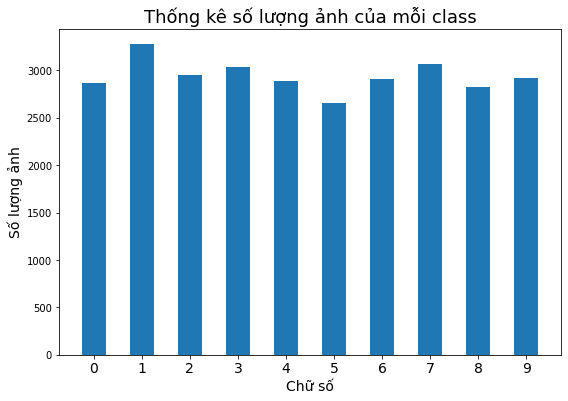

In [ ]:
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
counts = [0]*10

for i in range(0, len(data)):
    index = data['label'].values[i]
    counts[index] += 1
    
fig, ax = plt.subplots(figsize=(9,6))

ax.bar(digits, counts, width=0.5)

ax.set_title('Thống kê số lượng ảnh của mỗi class', fontsize=18)
ax.set_xlabel('Chữ số', fontsize=14)
ax.set_ylabel('Số lượng ảnh', fontsize=14)

plt.xticks(digits, fontsize=14)

plt.show()

## 3. Chia dữ liệu huấn luyện và chọn mô hình máy học

### Phân chia dữ liệu huấn luyện

In [ ]:
percent_train = 0.75
len_train = int(len(data)*percent_train)

y_train = np.array(data['label'][0:len_train])
X_train = np.array(data.iloc[:len_train,1:])

y_test = np.array(data['label'][len_train:])
X_test = np.array(data.iloc[len_train:,1:])

### Chọn mô hình máy học

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo một mô mình máy học.
model = RandomForestClassifier(max_depth=15)

# Bắt đầu huấn luyện mô hình trên dữ liệu được phân chia.
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import classification_report
# Đưa ra dự đoán nhãn của các mẫu dữ liệu trong tập dữ liệu kiểm thử được phân chia ở trên
y_pred = model.predict(X_test)

# Tính toán mộ số độ đo đánh giá mô hình
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=[str(i) for i in range(10)]))

# Tính độ chính xác của mô hình trên tập dữ liệu test đã được phân chia.
score = model.score(X_test, y_test)
print("Độ chính xác của mô hình là: {:.2f} %".format(score*100))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       724
           1       0.98      0.98      0.98       804
           2       0.95      0.97      0.96       728
           3       0.96      0.92      0.94       740
           4       0.95      0.95      0.95       718
           5       0.96      0.96      0.96       667
           6       0.97      0.98      0.97       727
           7       0.95      0.96      0.96       788
           8       0.96      0.94      0.95       719
           9       0.93      0.94      0.93       735

    accuracy                           0.96      7350
   macro avg       0.96      0.96      0.96      7350
weighted avg       0.96      0.96      0.96      7350

Độ chính xác của mô hình là: 95.74 %


## 3. Dự đoán nhãn cho dữ liệu test

In [ ]:
# Đọc dữ liệu từ file test
test_data = pd.read_csv(TEST_PATH)
test_vectors = np.array(test_data.iloc[:,:])

In [ ]:
result = np.array(model.predict(test_vectors))

### Ghi lại kết quả của bài toán vào file submission

In [ ]:
# Tạo một hàng đầu tiên có hai cột là ImangeID và Label
df = pd.DataFrame(columns=['ImageId','Label'])

# Duyệt dữ kết quả và ghi vào df
for i, v in enumerate(result):
  df = df.append({'ImageId':i+1,'Label':v}, ignore_index=True)

# Ghi ra file csv
df.to_csv('submission.csv',index = False)

## 4. Submit file submission lên hệ thống chấm điểm

In [ ]:
import math, requests

def submit_prediction(df, sep=',', comment='', compression='gzip', **kwargs):
    TOKEN='313e1d7d25f2621eed2b302b345e0214fbef7d22220fb2eab35faa70edbe2f628a5d18c289de96a2547bd0eb212949ad13fca395aa561a5b9ad2cbd7ef29a20b'
    URL='http://submission.mmlab.uit.edu.vn/api/submissions'
    df.to_csv('temporary.dat', sep=sep, compression=compression, **kwargs)
    r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': open('temporary.dat', 'rb')},data={'comment':comment, 'compression': compression})
    if r.status_code == 429:
        raise Exception('Submissions are too close. Next submission is only allowed in {} seconds.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0))))
    if r.status_code != 200:
        raise Exception(r.text)

In [ ]:
path = 'submission.csv'
submit_data = pd.read_csv(path)
submit_prediction(submit_data, sep=',', index=True, comment='test submission')

#### Kết quả submission

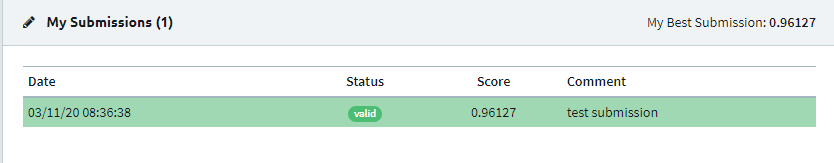

#### Xếp hạng 

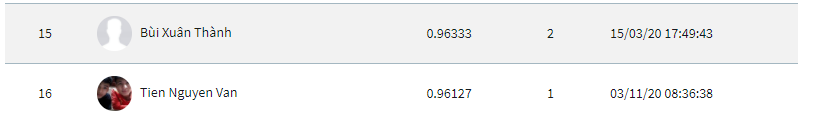